In [67]:
import os 
path, dirs, files = next(os.walk('train'))

print("There is ")
print(len(files))
print("files")

There is 
25000
files


In [68]:
file_names = os.listdir('train')[:2000]
print(file_names[0])

dog.8011.jpg


In [69]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

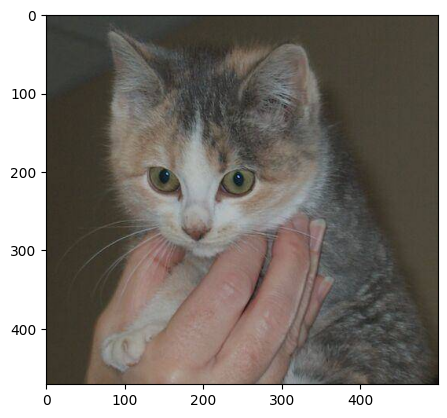

In [70]:
cat = mpimg.imread('train/cat.10002.jpg')
plt.imshow(cat)
plt.show()


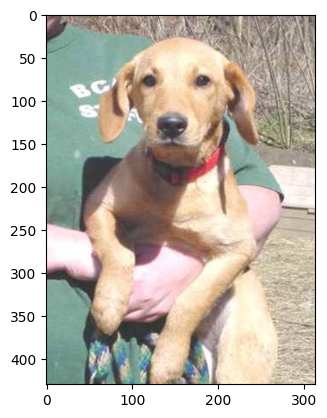

In [71]:
dog = mpimg.imread("train/dog.10145.jpg")
plt.imshow(dog)
plt.show()

In [72]:
dog_files = []
cat_files = []

labels = []

for file_name in file_names:
    if file_name.startswith('cat'):
       cat_files.append(file_name)
       labels.append(0)
    elif file_name.startswith('dog'):
       dog_files.append(file_name)
       labels.append(1)


print(len(dog_files))
print(len(cat_files))



1014
986


In [73]:
import PIL

for file_name in file_names:
    img = PIL.Image.open('train/' + file_name)
    img = img.resize((224,224))
    img = img.convert('RGB')

    img.save('resized/' + file_name)


In [74]:
import cv2 
import glob 
import numpy as np 

dog_cat_images = []

for file_name in file_names:
    dog_cat_images.append(cv2.imread('resized/' + file_name))

dog_cat_images = np.asarray(dog_cat_images)


In [75]:
from sklearn.model_selection import train_test_split

labels = np.asarray(labels)

X_train, X_test, Y_train, Y_test = train_test_split(dog_cat_images, labels, test_size = 0.2, random_state= 2)

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [76]:
import tensorflow as tf
import tensorflow_hub as hub

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [77]:
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(2)
])

model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [78]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [79]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5


2023-02-13 10:15:07.214012: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


50/50 [==============================] - 10s 153ms/step - loss: 0.1714 - acc: 0.9394
Epoch 2/5
50/50 [==============================] - 7s 140ms/step - loss: 0.0600 - acc: 0.9837
Epoch 3/5
50/50 [==============================] - 7s 139ms/step - loss: 0.0478 - acc: 0.9837
Epoch 4/5
50/50 [==============================] - 7s 139ms/step - loss: 0.0365 - acc: 0.9912
Epoch 5/5
50/50 [==============================] - 7s 140ms/step - loss: 0.0301 - acc: 0.9912


In [80]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 2s 136ms/step - loss: 0.0508 - acc: 0.9850
Test Loss = 0.05084235593676567
Test Accuracy = 0.9850000143051147


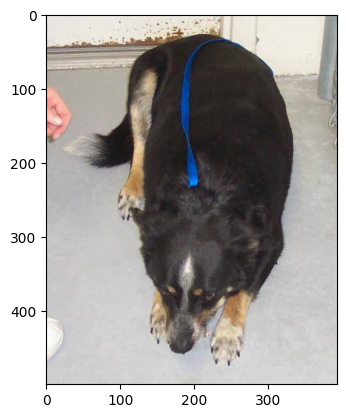

In [96]:
user_image = (input("Give me a number between 1 and 12500"))

test_image = mpimg.imread(f'test1/{ user_image }.jpg')
plt.imshow(test_image)
plt.show()

In [99]:
input_image = cv2.imread(f'test1/{ user_image }.jpg')

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

1/1 [==============================] - 0s 339ms/step
[[-1.0896883  0.9462889]]


In [100]:
)

SyntaxError: unmatched ')' (687023194.py, line 1)